<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/DataCamp_short_case_study_Flight_Etiquette_ggplot_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary:

Remove people who responded "Never" to a question asking if they have flown before.

Replicating published plot

Selecting columns that contains rude and gather()

count() different values

regex to change response_var (str_remove and str_replace_all)

Dichotomizing variables

mapping string response to 0 or 1.

Summarizing data

Plotting

First plot with geom_point and geom_segment

Reordering response_var directly in plot

geom_col(), label and removing x and y axis.

removing text and ticks in axis


# Import libraries

In [1]:
# Load  
library(dplyr)
library(ggplot2)
library(tidyr)
library(forcats)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import dataset

In [3]:
flying_etiquette = read.csv("https://assets.datacamp.com/production/repositories/1834/datasets/bef2c6e1ef42a2f230383e080fa7379912860017/flying-etiquette.csv")
str(flying_etiquette)

'data.frame':	1040 obs. of  27 variables:
 $ RespondentID                                                                                                                            : num  3.44e+09 3.43e+09 3.43e+09 3.43e+09 3.43e+09 ...
 $ How.often.do.you.travel.by.plane.                                                                                                       : chr  "Once a year or less" "Once a year or less" "Once a year or less" "Once a year or less" ...
 $ Do.you.ever.recline.your.seat.when.you.fly.                                                                                             : chr  "" "About half the time" "Usually" "Always" ...
 $ How.tall.are.you.                                                                                                                       : chr  "" "6'3\"" "5'8\"" "5'11\"" ...
 $ Do.you.have.any.children.under.18.                                                                                                      : chr  "" "Yes

# Remove people who responded "Never" to a question asking if they have flown before.



In [4]:
unique(flying_etiquette$How.often.do.you.travel.by.plane.)

[1] "Once a year or less"   "Once a month or less"  "Never"                
[4] "A few times per week"  "Every day"             "A few times per month"

In [5]:
flying_etiquette %>%
    # Change characters to factors
    mutate_if(is.character, as.factor) %>%
    # Filter out those who have never flown on a plane
    filter(How.often.do.you.travel.by.plane. != "Never") %>%
    head(2)

,RespondentID,How.often.do.you.travel.by.plane.,Do.you.ever.recline.your.seat.when.you.fly.,How.tall.are.you.,Do.you.have.any.children.under.18.,In.a.row.of.three.seats..who.should.get.to.use.the.two.arm.rests.,In.a.row.of.two.seats..who.should.get.to.use.the.middle.arm.rest.,Who.should.have.control.over.the.window.shade.,Is.itrude.to.move.to.an.unsold.seat.on.a.plane.,Generally.speaking..is.it.rude.to.say.more.than.a.few.words.tothe.stranger.sitting.next.to.you.on.a.plane.,⋯,Is.itrude.to.wake.a.passenger.up.if.you.are.trying.to.walk.around.,In.general..is.itrude.to.bring.a.baby.on.a.plane.,In.general..is.it.rude.to.knowingly.bring.unruly.children.on.a.plane.,Have.you.ever.used.personal.electronics.during.take.off.or.landing.in.violation.of.a.flight.attendant.s.direction.,Have.you.ever.smoked.a.cigarette.in.an.airplane.bathroom.when.it.was.against.the.rules.,Gender,Age,Household.Income,Education,Location..Census.Region.
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,3436139758,Once a year or less,,,,,,,,,⋯,,,,,,,,,,
2,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",⋯,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,,Graduate degree,Pacific


# Replicating published plot

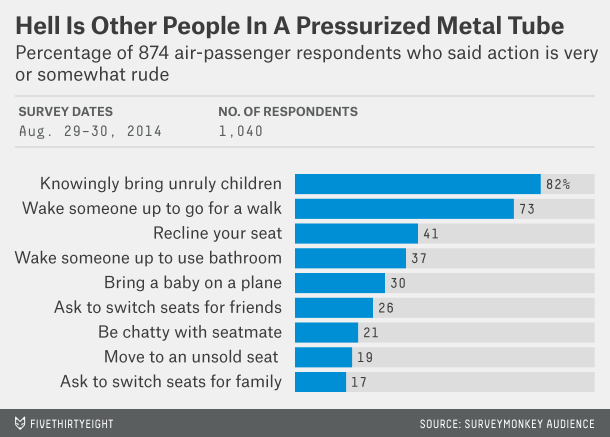

## Selecting columns that contains rude and gather()

In [9]:
gathered_data <- flying_etiquette %>%
    # Change characters to factors
    mutate_if(is.character, as.factor) %>%
    # Filter out those who have never flown on a plane
    filter(How.often.do.you.travel.by.plane. != "Never") %>%
    # Select columns containing "rude"
    select(contains("rude")) %>%
    # Change format from wide to long
    gather(response_var, value)

head(gathered_data,4)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


,response_var,value
,<chr>,<chr>
1,Is.itrude.to.move.to.an.unsold.seat.on.a.plane.,
2,Is.itrude.to.move.to.an.unsold.seat.on.a.plane.,"No, not rude at all"
3,Is.itrude.to.move.to.an.unsold.seat.on.a.plane.,"No, not rude at all"
4,Is.itrude.to.move.to.an.unsold.seat.on.a.plane.,"No, not rude at all"


## count() different values

In [10]:
gathered_data %>%
  count(value)

value,n
<chr>,<int>
,204
"No, not at all rude",3511
"No, not rude at all",1192
"Yes, somewhat rude",2131
"Yes, very rude",828


## regex to change response_var (str_remove and str_replace_all)

We need to change response_var to replicate de image

Expression	Does this
.	matches any character
*	zero or more times

For example, ".*science " would match "data science " in the string "data science rocks!"

In [11]:
gathered_data <- gathered_data %>%
    # Remove everything before and including "rude to " (with that space at the end!)
    mutate(response_var = str_remove(response_var, '.*rude.to.')) %>%
    # Remove "on a plane"
    mutate(response_var = str_remove(response_var, 'on.a.plane.')) %>%
    mutate(response_var = str_replace_all(response_var, '[.]', " "))

head(gathered_data,4)

,response_var,value
,<chr>,<chr>
1,move to an unsold seat,
2,move to an unsold seat,"No, not rude at all"
3,move to an unsold seat,"No, not rude at all"
4,move to an unsold seat,"No, not rude at all"


## Dichotomizing variables

Remove rows with NA in the value column
Create a new variable, rude, which is 0 if the value column is "No, not rude at all" or "No, not at all rude" and 1 otherwise.

In [12]:
# Removing rows with no response.

gathered_data <- gathered_data %>%
 filter(value != "")

gathered_data %>%
  count(value)

value,n
<chr>,<int>
"No, not at all rude",3511
"No, not rude at all",1192
"Yes, somewhat rude",2131
"Yes, very rude",828


#### mapping string response to 0 or 1.

In [13]:
gathered_data <- gathered_data %>%
    # Dichotomize the value variable to make a new variable, rude
    mutate(rude = if_else(value %in% c('No, not rude at all', 'No, not at all rude'), 0, 1))

head(gathered_data,4)

,response_var,value,rude
,<chr>,<chr>,<dbl>
1,move to an unsold seat,"No, not rude at all",0
2,move to an unsold seat,"No, not rude at all",0
3,move to an unsold seat,"No, not rude at all",0
4,move to an unsold seat,"No, not rude at all",0


## Summarizing data


In [14]:
gathered_data <- gathered_data %>%
    # Group by response_var
    group_by(response_var) %>%
    # Create perc_rude, the percent considering each behavior rude
    summarise(perc_rude = mean(rude))

gathered_data

response_var,perc_rude
<chr>,<dbl>
ask someone to switch seats with you in order to be closer to family,0.1705882
ask someone to switch seats with you in order to be closer to friends,0.2576471
bring a baby,0.3027091
knowingly bring unruly children,0.8268551
move to an unsold seat,0.1929825
recline your seat,0.4121780
say more than a few words tothe stranger sitting next to you,0.2105263
wake a passenger up if you are trying to go to the bathroom,0.3705882
wake a passenger up if you are trying to walk around,0.7341176


# Plotting

## First plot with geom_point and geom_segment

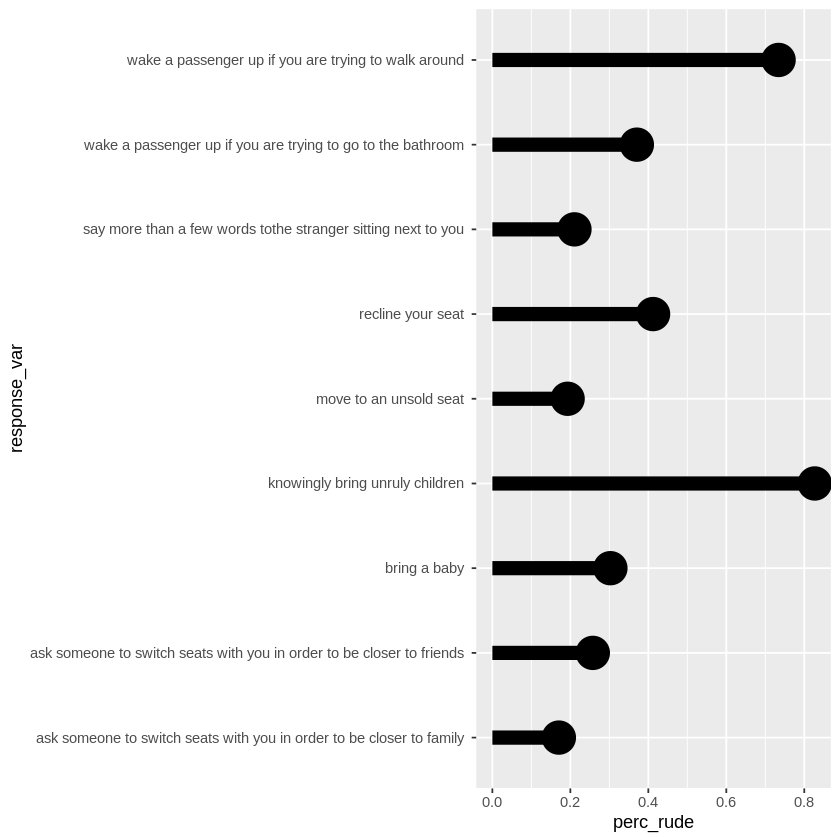

In [15]:
ggplot(gathered_data, aes(y=response_var, x= perc_rude)) +
  geom_point(size = 9) +
  geom_segment(aes(xend = 0, yend = response_var), size = 4)

## Reordering response_var directly in plot

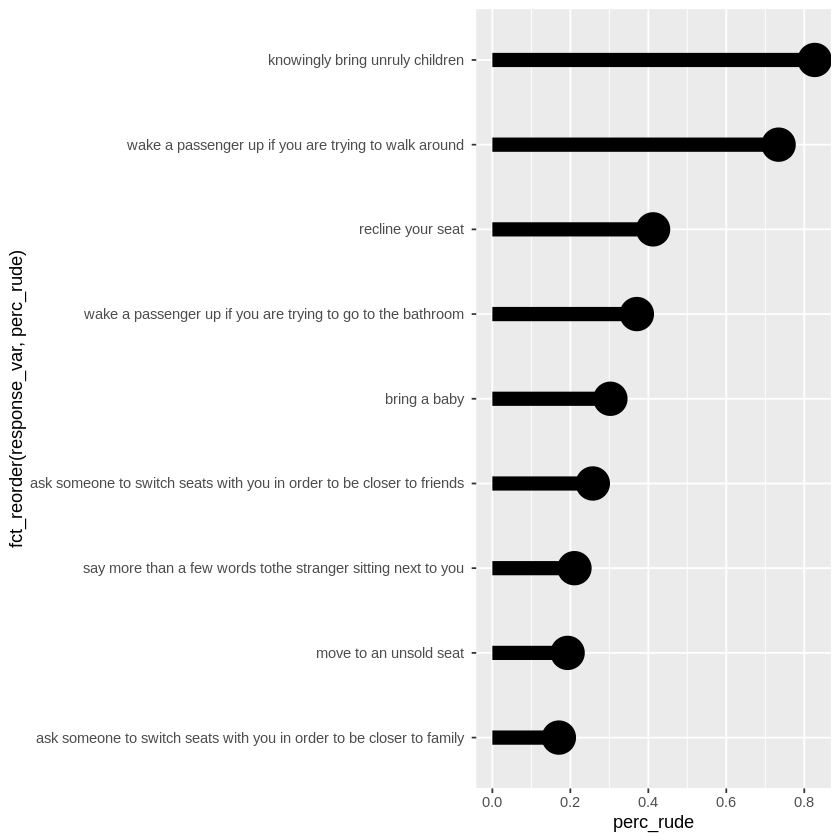

In [16]:
ggplot(gathered_data, aes(y= fct_reorder(response_var,perc_rude), x= perc_rude)) +
  geom_point(size = 9) +
  geom_segment(aes(xend = 0, yend = response_var), size = 4)

## geom_col(), label and removing x and y axis.

In [43]:
?geom_col()

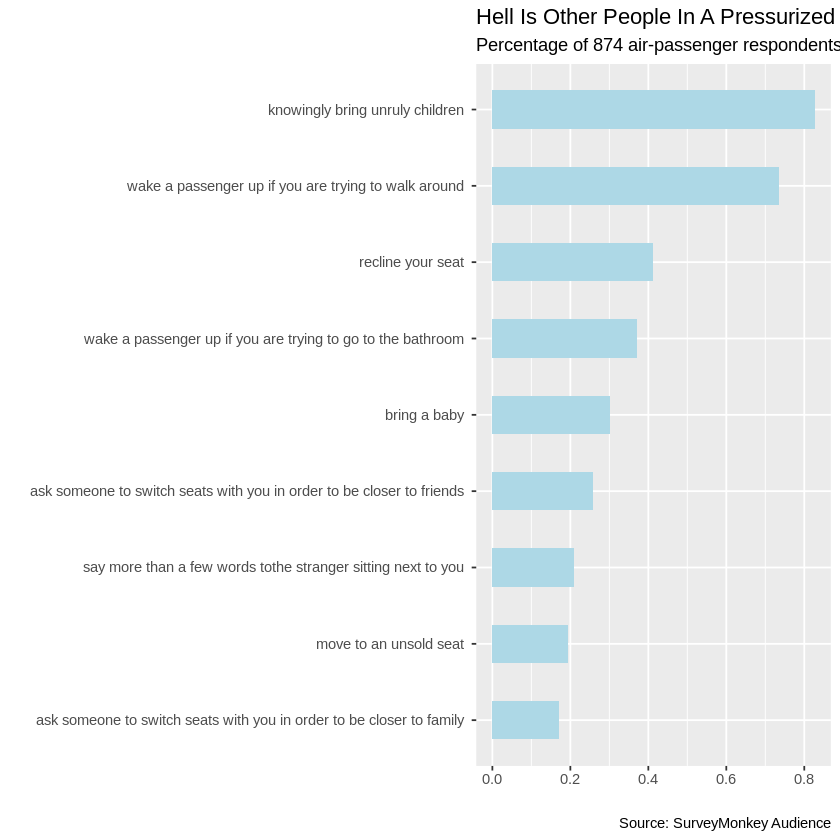

In [53]:
col_plot <- ggplot(gathered_data, aes(y= fct_reorder(response_var,perc_rude), x= perc_rude)) +
  geom_col(width =0.5, fill="light blue") +
  labs(title = "Hell Is Other People In A Pressurized Metal Tube",
         subtitle = "Percentage of 874 air-passenger respondents who said action is very or somewhat rude",
         caption = "Source: SurveyMonkey Audience", 
         # Remove the x- and y-axis labels
         x = "",
         y = "") 

col_plot

## removing text and ticks in axis 

element_blank() is a nice way to keep your graphs looking tidy when you don't need the tick marks.

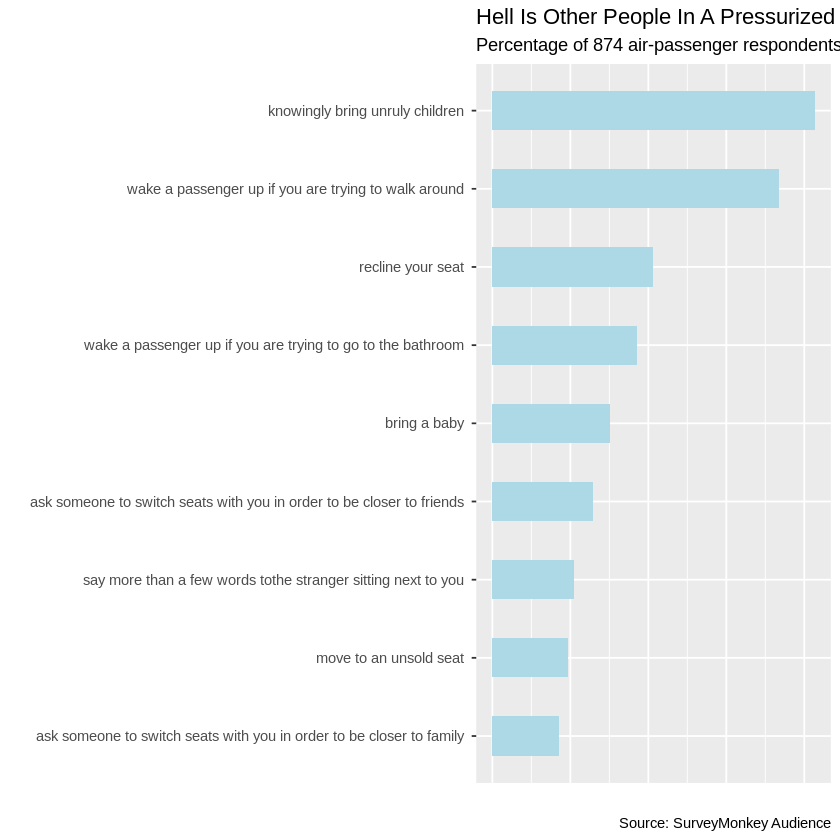

In [54]:
 col_plot + 
    # Remove the x-axis ticks and labels
    theme(axis.text.x = element_blank(),
          axis.ticks.x = element_blank())

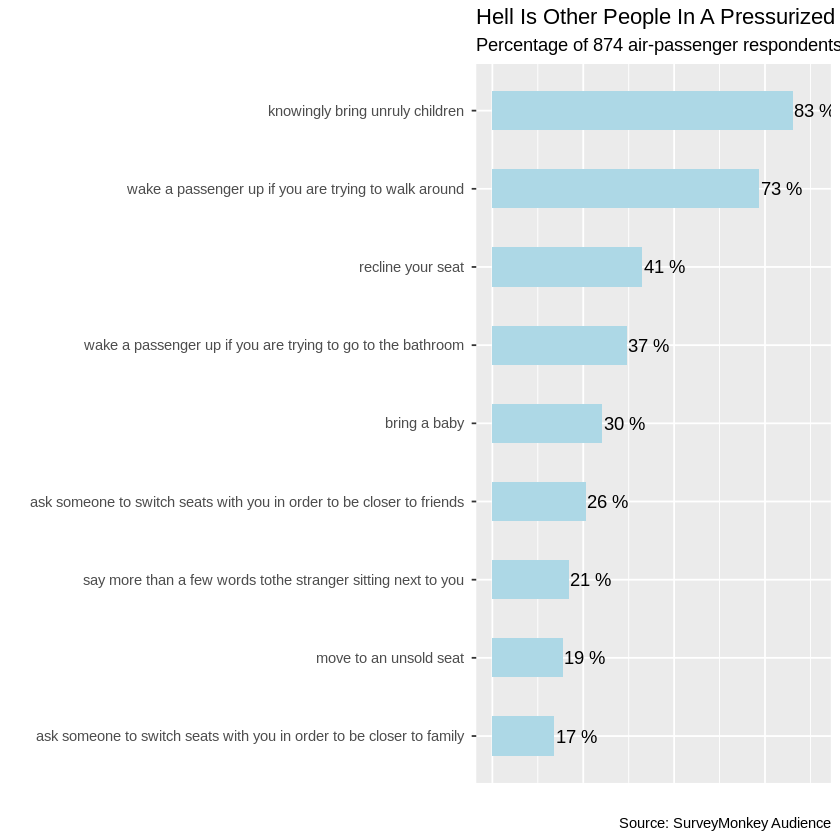

In [56]:
 col_plot + 
    # Remove the x-axis ticks and labels
    theme(axis.text.x = element_blank(),
          axis.ticks.x = element_blank()) + 
    # Apply percent() to perc_rude to label above the bar with the perc value
    geom_text(aes(label = paste(round(perc_rude*100),"%"), 
                  x = perc_rude + .06))